In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
import re

#### Importing Dataset

In [3]:
Data = pd.read_excel(r'C:\Users\user\Desktop\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform\Womens Clothing Reviews Data.xlsx')

#### a. Performing exploratory analysis on the data to understand the patterns

In [4]:
Data.head(2)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [6]:
Data.columns = Data.columns.str.replace(' ','_')

In [7]:
Data.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

In [8]:
Data.isna().sum()

Product_ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer_Age         0
Review_Title      3810
Review_Text        845
Rating               0
Recommend_Flag       0
dtype: int64

In [9]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_ID,23486.0,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
Customer_Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommend_Flag,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0


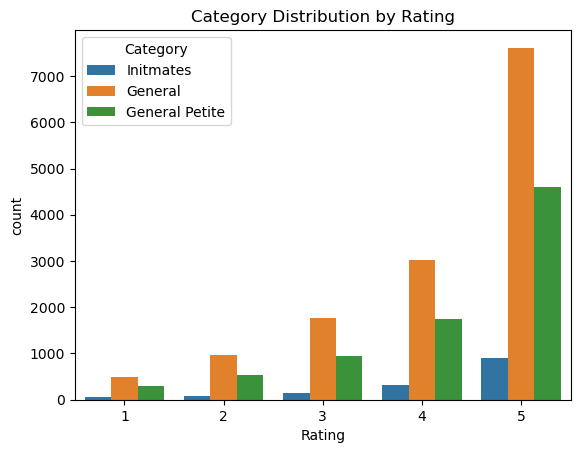

In [10]:
sns.countplot(x='Rating',hue='Category',data= Data)
plt.title('Category Distribution by Rating')
plt.show()

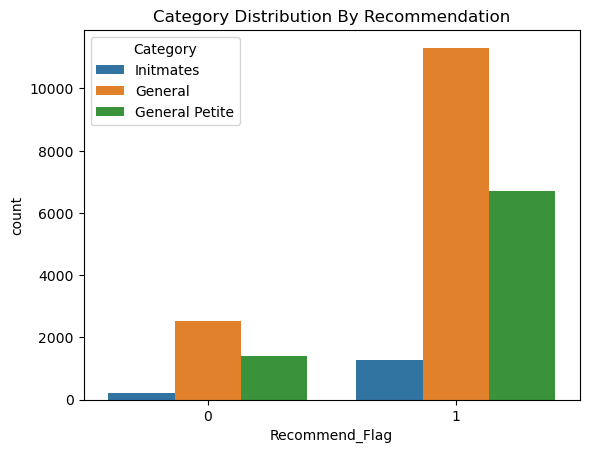

In [11]:
sns.countplot(x='Recommend_Flag',hue='Category',data= Data)
plt.title('Category Distribution By Recommendation')
plt.show()

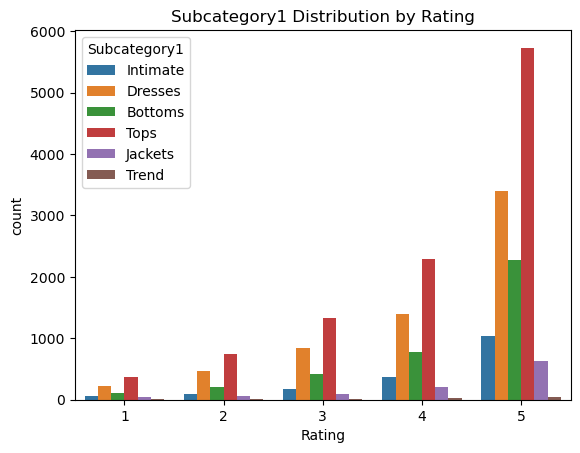

In [12]:
sns.countplot(x='Rating',hue='Subcategory1',data= Data)
plt.title('Subcategory1 Distribution by Rating')
plt.show()

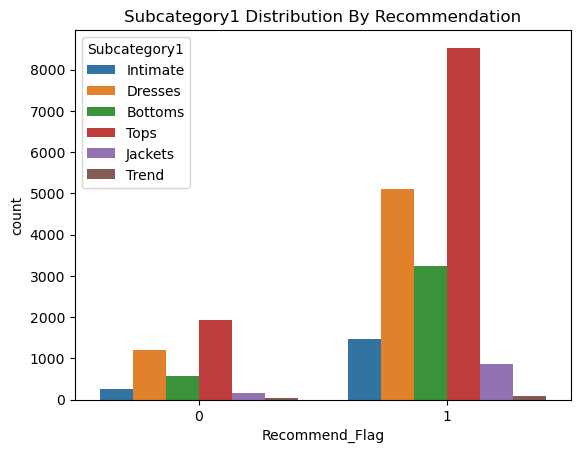

In [13]:
sns.countplot(x='Recommend_Flag',hue='Subcategory1',data= Data)
plt.title('Subcategory1 Distribution By Recommendation')
plt.show()

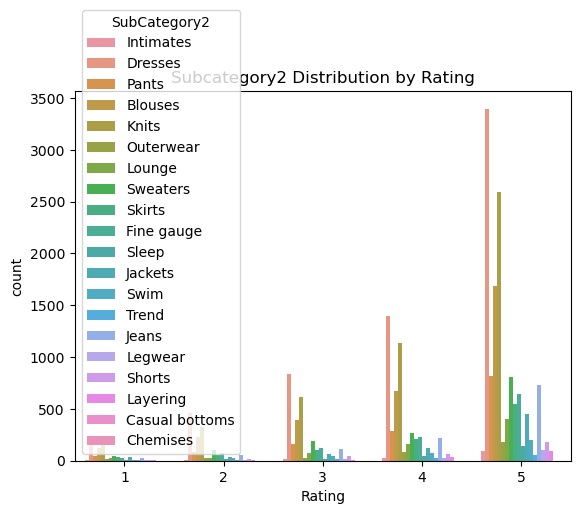

In [14]:
sns.countplot(x='Rating',hue='SubCategory2',data= Data)
plt.title('Subcategory2 Distribution by Rating')
plt.show()

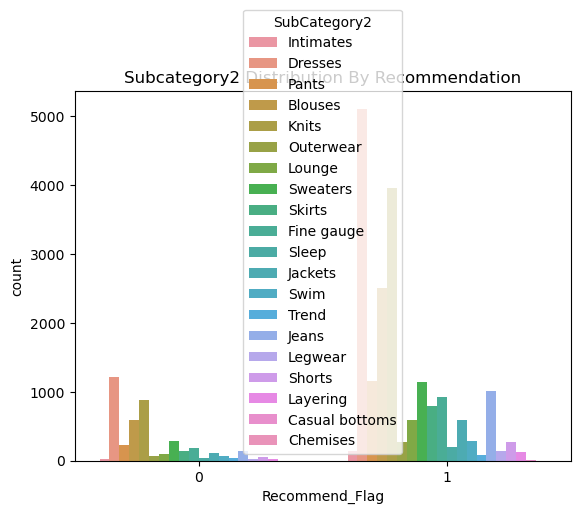

In [15]:
sns.countplot(x='Recommend_Flag',hue='SubCategory2',data= Data)
plt.title('Subcategory2 Distribution By Recommendation')
plt.show()

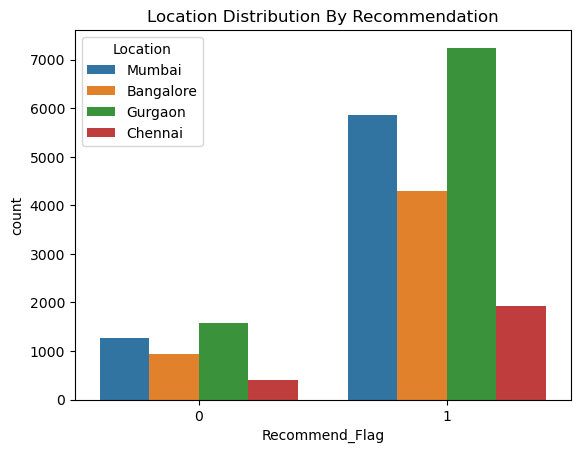

In [16]:
sns.countplot( x = 'Recommend_Flag', hue ='Location', data=Data)
plt.title('Location Distribution By Recommendation')
plt.show()

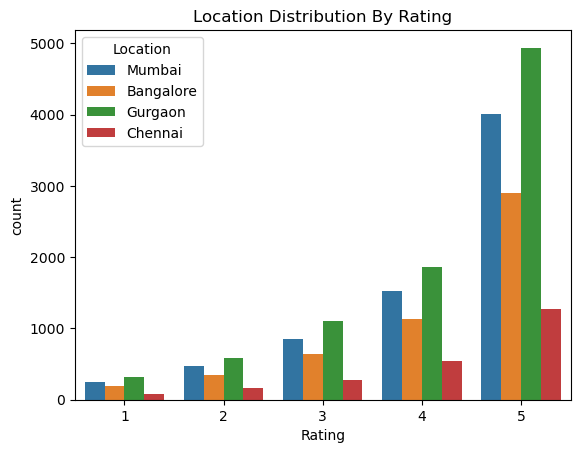

In [17]:
sns.countplot( x = 'Rating',hue ='Location',data=Data)
plt.title('Location Distribution By Rating')
plt.show()

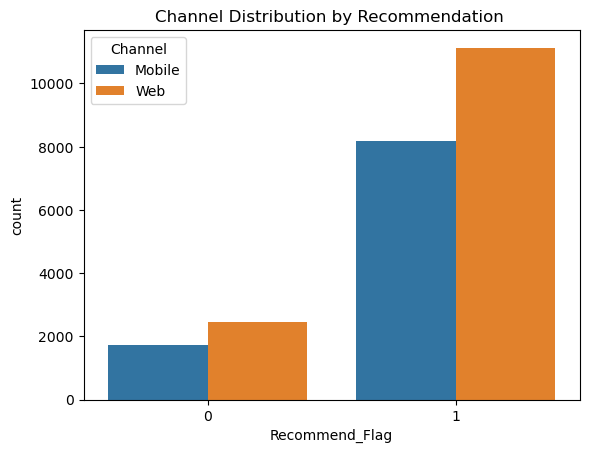

In [18]:
sns.countplot(x='Recommend_Flag',hue='Channel',data=Data)
plt.title('Channel Distribution by Recommendation ')
plt.show()

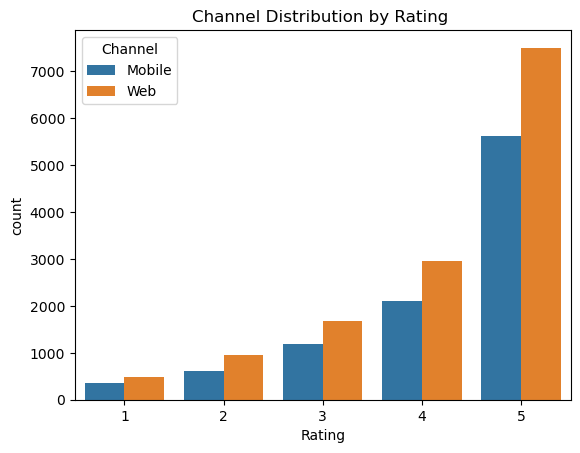

In [19]:
sns.countplot(x='Rating',hue='Channel',data=Data)
plt.title('Channel Distribution by Rating ')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


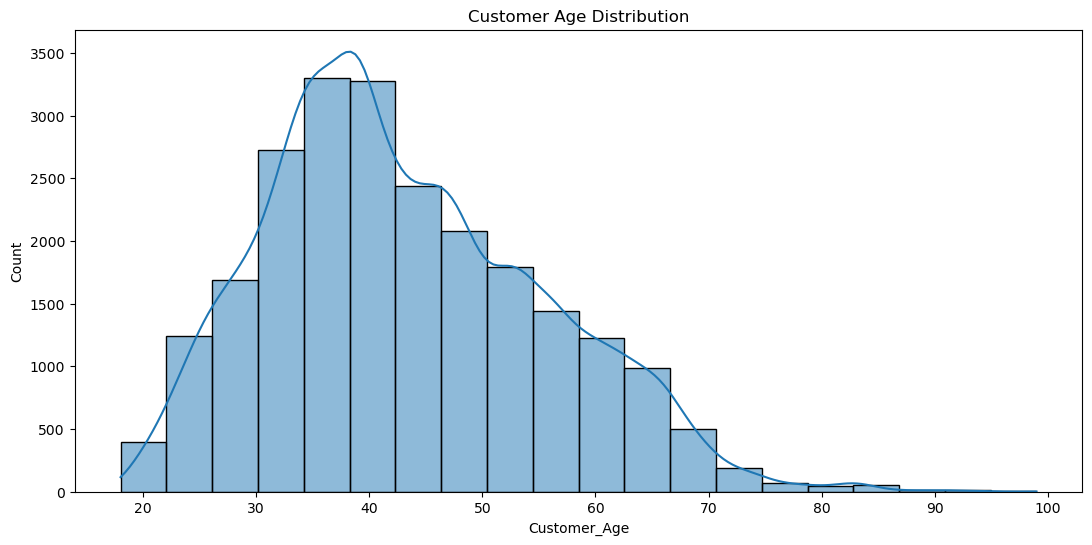

In [20]:
plt.figure(figsize=(13, 6))
sns.histplot(Data['Customer_Age'],bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

#### Feature Selection

In [21]:
Data.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

In [22]:
Data1 = Data.drop(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location','Channel', 'Customer_Age', 'Review_Title','Rating'],axis=1)

In [23]:
Data1.head()

,Review_Text,Recommend_Flag
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [24]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_Text     22641 non-null  object
 1   Recommend_Flag  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [25]:
Data1.isna().sum()

Review_Text       845
Recommend_Flag      0
dtype: int64

In [26]:
Data1.dropna(axis=0,inplace=True)

In [27]:
Data1.isna().sum()

Review_Text       0
Recommend_Flag    0
dtype: int64

In [28]:
Data1.shape

(22641, 2)

#### Text Mining

In [29]:
# Importing nltk 

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
# Importing stopwords,sent_tokenize, word_tokenize,WordNetLemmatizer,PorterStemmer

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [31]:
stop_words = set(stopwords.words('english'))

In [32]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [34]:
def clean(data):
    
    
    text = re.sub('[^\w\s]','', data)
         
   
    text_tokens = word_tokenize(text.lower()) 
    
    
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [35]:
txt = re.sub('[^\w\s]','', str(Data1['Review_Text']))
txt

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review_Text Length 22641 dtype object'

In [36]:
text_tokens = word_tokenize(txt.lower()) 
text_tokens

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review_text',
 'length',
 '22641',
 'dtype',
 'object']

In [37]:
tokens_without_punc = [w for w in text_tokens if w.isalpha()]
tokens_without_punc

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'length',
 'dtype',
 'object']

In [38]:
tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
tokens_without_sw

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hopes',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'length',
 'dtype',
 'object']

In [39]:
text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
text_cleaned

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hope',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'length',
 'dtype',
 'object']

In [40]:
text = clean(str(Data1["Review_Text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name length dtype object'

In [41]:
Data1['Review_Text'] = Data1['Review_Text'].apply(clean)
Data1['Review_Text'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

In [42]:
word_values = pd.Series(" ".join(Data1['Review_Text']).split()).value_counts()
word_values

dress            11294
fit              10072
size              9336
love              8961
top               8230
                 ...  
fabricfit            1
straighthence        1
parallel             1
cartwheel            1
platinum             1
Name: count, Length: 16731, dtype: int64

In [43]:
rare_words = word_values[word_values <= 2]
rare_words

featuring        2
alternation      2
sweaterit        2
veryvery         2
assistance       2
                ..
fabricfit        1
straighthence    1
parallel         1
cartwheel        1
platinum         1
Name: count, Length: 10914, dtype: int64

In [44]:
rare_words.value_counts()

count
1    9034
2    1880
Name: count, dtype: int64

In [45]:
len(rare_words)

10914

In [46]:
rare_words.index

Index(['featuring', 'alternation', 'sweaterit', 'veryvery', 'assistance',
       'photoshopped', 'sienna', 'addict', 'atrocious', 'swingyflared',
       ...
       'mosly', 'joking', 'cuteperfect', 'yellowgoldorange', 'samei',
       'fabricfit', 'straighthence', 'parallel', 'cartwheel', 'platinum'],
      dtype='object', length=10914)

In [47]:
Data1['Review_Text'] = Data1['Review_Text'].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
Data1['Review_Text'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

In [48]:
Data1.head()

,Review_Text,Recommend_Flag
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


#### WordCloud of Positive and Negative Reviews

In [49]:
Data1.Recommend_Flag.value_counts()

Recommend_Flag
1    18540
0     4101
Name: count, dtype: int64

In [50]:
" ".join(Data1['Review_Text']).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'f

In [51]:
positive_words = " ".join(Data1[Data1['Recommend_Flag'] == 1].Review_Text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [52]:
negitive_words = " ".join(Data1[Data1['Recommend_Flag'] == 0].Review_Text).split()
negitive_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'mat

In [53]:
Review_Text = Data1['Review_Text']

In [54]:
All_words = " ".join(Review_Text)

In [55]:
All_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [56]:
# Importing WordCloud

from wordcloud import WordCloud 

In [57]:
wordcloud = WordCloud(background_color="white", max_words =250).generate(All_words)

In [58]:
wordcloud = WordCloud(background_color="white", max_words =250).generate(str(positive_words))

In [59]:
wordcloud = WordCloud(background_color="white", max_words =250).generate(str(negitive_words))

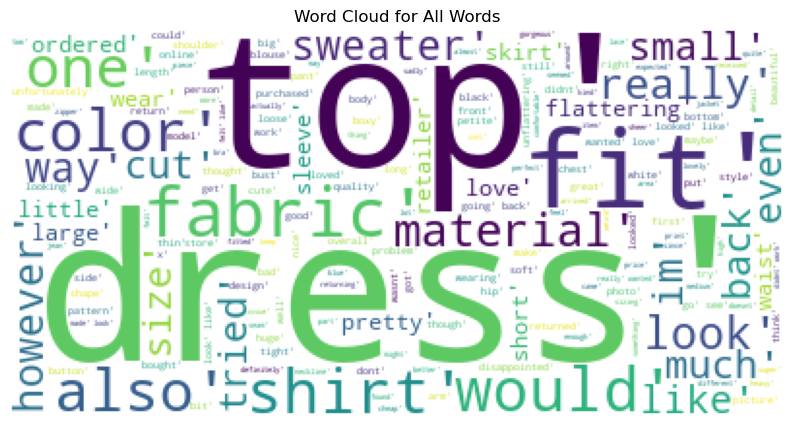

In [60]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for All Words')
plt.show()

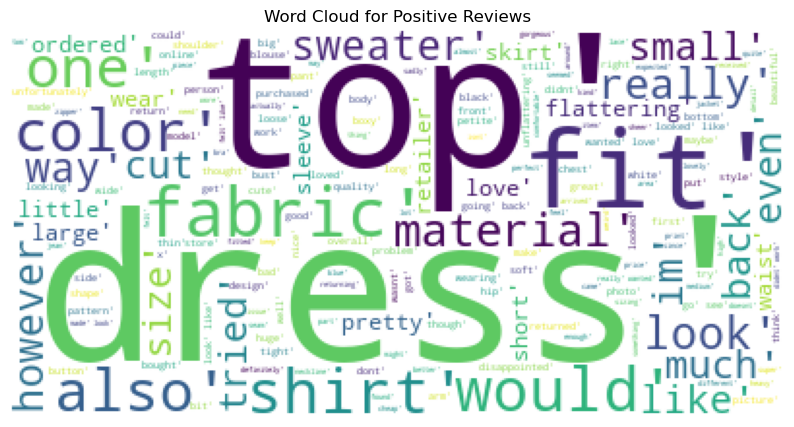

In [61]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()

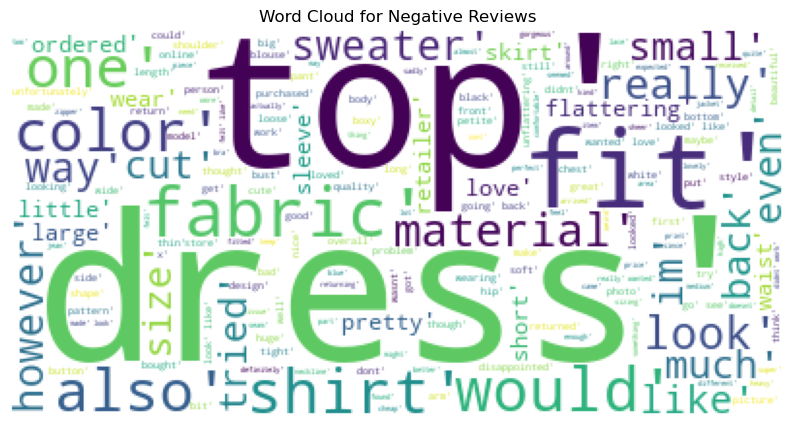

In [62]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Negative Reviews')
plt.show()

#### Train-Test-Split

In [63]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [64]:
x = Data1.Review_Text
y = Data1.Recommend_Flag

In [65]:
x.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

In [66]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Recommend_Flag, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=101)

In [68]:
x_train.shape

(18112,)

In [69]:
x_test.shape

(4529,)

#### Count Vectorization

In [70]:
# Importing CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [71]:
vectorizer = CountVectorizer()

In [72]:
x_train_count = vectorizer.fit_transform(x_train)
x_test_count = vectorizer.transform(x_test)

In [73]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
vectorizer.get_feature_names_out()

array(['aa', 'ab', 'abby', ..., 'zone', 'zoom', 'ãâ'], dtype=object)

In [75]:
x_vectorized = pd.DataFrame(x_train_count.toarray(), columns = vectorizer.get_feature_names_out())
x_vectorized

,aa,ab,abby,abdomen,ability,able,abo,abovetheknee,absolute,absolutely,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,ãâ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF Vectorization

In [76]:
# Importing TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
tfidf_vectorizer = TfidfVectorizer()

In [78]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [79]:
x_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
tfidf_vectorizer.get_feature_names_out()

array(['aa', 'ab', 'abby', ..., 'zone', 'zoom', 'ãâ'], dtype=object)

In [81]:
x_vectorized_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
x_vectorized_tfidf

,aa,ab,abby,abdomen,ability,able,abo,abovetheknee,absolute,absolutely,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,ãâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Machine Learning Models

In [82]:
def evaluate(model, x_train, x_test, y_train, y_test):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    
    print("Confusion Matrix")
    confusionmatrix = confusion_matrix(y_test, y_pred)
    print(confusionmatrix)

#### Logistic Regression - Count Vectorizer

In [83]:
# Importing LogisticRegression

from sklearn.linear_model import LogisticRegression

In [84]:
# Importing metrics

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [85]:
model = LogisticRegression(C=0.6, max_iter = 1000, class_weight='balanced', random_state = 101)
model.fit(x_train_count, y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [86]:
evaluate(model,x_train_count,x_test_count,y_train,y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       820
           1       0.95      0.89      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.84      0.81      4529
weighted avg       0.89      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      3281
           1       0.99      0.92      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.85      0.94      0.89     18112
weighted avg       0.94      0.92      0.93     18112

Confusion Matrix
[[ 657  163]
 [ 416 3293]]


In [87]:
y_pred_train = model.predict(x_train_count)
y_pred_test = model.predict(x_test_count)

In [88]:
# Accuracy

train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy :',train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print('Test Accuracy :',test_accuracy)

Train Accuracy : 0.9243043286219081
Test Accuracy : 0.8721572090969308


In [89]:
# Precision

train_precision = precision_score(y_train,y_pred_train,average = 'weighted')
print('Train Precision :',train_precision)
test_precision = precision_score(y_test,y_pred_test,average = 'weighted')
print('Test Precision :',test_precision)

Train Precision : 0.9407316003173929
Test Precision : 0.8911801774845897


In [90]:
# Recall

train_recall = recall_score(y_train,y_pred_train,average = 'weighted')
print('Train Recall :',train_recall)
test_recall = recall_score(y_test,y_pred_test,average = 'weighted')
print('Test Recall :',test_recall)

Train Recall : 0.9243043286219081
Test Recall : 0.8721572090969308


In [91]:
# F1 Score

train_f1 = f1_score(y_train,y_pred_train,average = 'weighted')
print('Train F1 Score :',train_f1)
test_f1 = f1_score(y_test,y_pred_test,average = 'weighted')
print('Test F1 Score :',test_f1)

Train F1 Score : 0.9282660681598904
Test F1 Score : 0.8784432233504638


#### Logistic Regression - TF-IDF Vectorizer

In [92]:
model1 = LogisticRegression(C=0.1, max_iter = 1000, class_weight='balanced', random_state = 101)
model1.fit(x_train_tfidf, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [93]:
evaluate(model1,x_train_tfidf,x_test_tfidf,y_train,y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       820
           1       0.97      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112

Confusion Matrix
[[ 708  112]
 [ 574 3135]]


In [94]:
y_pred_train_tfidf = model1.predict(x_train_tfidf)
y_pred_test_tfidf = model1.predict(x_test_tfidf)

In [95]:
# Accuracy

train_accuracy_tfidf = accuracy_score(y_train,y_pred_train_tfidf)
print('Train Accuracy :',train_accuracy_tfidf)
test_accuracy_tfidf = accuracy_score(y_test,y_pred_test_tfidf)
print('Test Accuracy :',test_accuracy_tfidf)

Train Accuracy : 0.8573873674911661
Test Accuracy : 0.848531684698609


In [96]:
# Precision

train_precision_tfidf = precision_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Precision :',train_precision_tfidf)
test_precision_tfidf = precision_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Precision :',test_precision_tfidf)

Train Precision : 0.8985450888907086
Test Precision : 0.8906864591141695


In [97]:
# Recall

train_recall_tfidf = recall_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Recall :',train_recall_tfidf)
test_recall_tfidf = recall_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Recall :',test_recall_tfidf)

Train Recall : 0.8573873674911661
Test Recall : 0.848531684698609


In [98]:
# F1 Score

train_f1_tfidf = f1_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train F1 Score :',train_f1_tfidf)
test_f1_tfidf = f1_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test F1 Score :',test_f1_tfidf)

Train F1 Score : 0.868314532636194
Test F1 Score : 0.8601472743702689


#### Navie Bayes - Count Vectorizer

In [99]:
# Importing MultinomialNB and BernoulliNB

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [100]:
naviebayes = MultinomialNB()
naviebayes.fit(x_train_count,y_train)

MultinomialNB()

In [101]:
evaluate(naviebayes, x_train_count, x_test_count,y_train, y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.83      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112

Confusion Matrix
[[ 607  213]
 [ 306 3403]]


In [102]:
y_pred_train = naviebayes.predict(x_train_count)
y_pred_test = naviebayes.predict(x_test_count)

In [103]:
# Accuracy

train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy :',train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print('Test Accuracy :',test_accuracy)

Train Accuracy : 0.9031581272084805
Test Accuracy : 0.8854051667034666


In [104]:
# Precision

train_precision = precision_score(y_train,y_pred_train,average = 'weighted')
print('Train Precision :',train_precision)
test_precision = precision_score(y_test,y_pred_test,average = 'weighted')
print('Test Precision :',test_precision)

Train Precision : 0.9107412882237627
Test Precision : 0.8910778576582423


In [105]:
# Recall

train_recall = recall_score(y_train,y_pred_train,average = 'weighted')
print('Train Recall :',train_recall)
test_recall = recall_score(y_test,y_pred_test,average = 'weighted')
print('Test Recall :',test_recall)

Train Recall : 0.9031581272084805
Test Recall : 0.8854051667034666


In [106]:
# F1 Score

train_f1 = f1_score(y_train,y_pred_train,average = 'weighted')
print('Train F1 Score :',train_f1)
test_f1 = f1_score(y_test,y_pred_test,average = 'weighted')
print('Test F1 Score :',test_f1)

Train F1 Score : 0.9059142850857329
Test F1 Score : 0.8877525227108187


#### Navie Bayes - TF-IDF Vectorizer

In [107]:
naviebayes1 = MultinomialNB()
naviebayes1.fit(x_train_tfidf,y_train)

MultinomialNB()

In [108]:
evaluate(naviebayes1,x_train_tfidf,x_test_tfidf,y_train,y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.87      0.16      0.28       820
           1       0.84      0.99      0.91      3709

    accuracy                           0.84      4529
   macro avg       0.85      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.22      0.36      3281
           1       0.85      1.00      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.64     18112
weighted avg       0.87      0.86      0.82     18112

Confusion Matrix
[[ 135  685]
 [  21 3688]]


In [109]:
y_pred_train_tfidf = naviebayes1.predict(x_train_tfidf)
y_pred_test_tfidf = naviebayes1.predict(x_test_tfidf)

In [110]:
# Accuracy

train_accuracy_tfidf = accuracy_score(y_train,y_pred_train_tfidf)
print('Train Accuracy :',train_accuracy_tfidf)
test_accuracy_tfidf = accuracy_score(y_test,y_pred_test_tfidf)
print('Test Accuracy :',test_accuracy_tfidf)

Train Accuracy : 0.8568352473498233
Test Accuracy : 0.8441156988297638


In [111]:
# Precision

train_precision_tfidf = precision_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Precision :',train_precision_tfidf)
test_precision_tfidf = precision_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Precision :',test_precision_tfidf)

Train Precision : 0.8705711760894101
Test Precision : 0.8473451890178318


In [112]:
# Recall

train_recall_tfidf = recall_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Recall :',train_recall_tfidf)
test_recall_tfidf = recall_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Recall :',test_recall_tfidf)

Train Recall : 0.8568352473498233
Test Recall : 0.8441156988297638


In [113]:
# F1 Score

train_f1_tfidf = f1_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train F1 Score :',train_f1_tfidf)
test_f1_tfidf = f1_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test F1 Score :',test_f1_tfidf)

Train F1 Score : 0.8178388732759986
Test F1 Score : 0.7974930436165988


#### Support Vector Machine - Count Vectorizer

In [114]:
# Importing LinearSVC

from sklearn.svm import LinearSVC

In [115]:
svc = LinearSVC(C=0.01, class_weight='balanced', random_state=101)
svc.fit(x_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [116]:
evaluate(svc,x_train_count,x_test_count,y_train,y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.90     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112

Confusion Matrix
[[ 691  129]
 [ 464 3245]]


In [117]:
y_pred_train = svc.predict(x_train_count)
y_pred_test = svc.predict(x_test_count)

In [118]:
# Accuracy

train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy :',train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print('Test Accuracy :',test_accuracy)

Train Accuracy : 0.8952075971731449
Test Accuracy : 0.8690660189887393


In [119]:
# Precision

train_precision = precision_score(y_train,y_pred_train,average = 'weighted')
print('Train Precision :',train_precision)
test_precision = precision_score(y_test,y_pred_test,average = 'weighted')
print('Test Precision :',test_precision)

Train Precision : 0.9210043251067619
Test Precision : 0.8959531567899587


In [120]:
# Recall

train_recall = recall_score(y_train,y_pred_train,average = 'weighted')
print('Train Recall :',train_recall)
test_recall = recall_score(y_test,y_pred_test,average = 'weighted')
print('Test Recall :',test_recall)

Train Recall : 0.8952075971731449
Test Recall : 0.8690660189887393


In [121]:
# F1 Score

train_f1 = f1_score(y_train,y_pred_train,average = 'weighted')
print('Train F1 Score :',train_f1)
test_f1 = f1_score(y_test,y_pred_test,average = 'weighted')
print('Test F1 Score :',test_f1)

Train F1 Score : 0.901825171245886
Test F1 Score : 0.8770741972307002


#### Support Vector Machine - TF-IDF Vectorizer

In [122]:
svc1 = LinearSVC(C=0.01, class_weight='balanced', random_state=101)
svc1.fit(x_train_tfidf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [123]:
evaluate(svc1,x_train_tfidf,x_test_tfidf,y_train,y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       820
           1       0.97      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112

Confusion Matrix
[[ 710  110]
 [ 576 3133]]


In [124]:
y_pred_train_tfidf = svc1.predict(x_train_tfidf)
y_pred_test_tfidf = svc1.predict(x_test_tfidf)

In [125]:
# Accuracy

train_accuracy_tfidf = accuracy_score(y_train,y_pred_train_tfidf)
print('Train Accuracy :',train_accuracy_tfidf)
test_accuracy_tfidf = accuracy_score(y_test,y_pred_test_tfidf)
print('Test Accuracy :',test_accuracy_tfidf)

Train Accuracy : 0.8558414310954063
Test Accuracy : 0.848531684698609


In [126]:
# Precision

train_precision_tfidf = precision_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Precision :',train_precision_tfidf)
test_precision_tfidf = precision_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Precision :',test_precision_tfidf)

Train Precision : 0.8982667788650034
Test Precision : 0.8911272389656157


In [127]:
# Recall

train_recall_tfidf = recall_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Recall :',train_recall_tfidf)
test_recall_tfidf = recall_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Recall :',test_recall_tfidf)

Train Recall : 0.8558414310954063
Test Recall : 0.848531684698609


In [128]:
# F1 Score

train_f1_tfidf = f1_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train F1 Score :',train_f1_tfidf)
test_f1_tfidf = f1_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test F1 Score :',test_f1_tfidf)

Train F1 Score : 0.8670426417361788
Test F1 Score : 0.860213033595213


#### Random Forest - Count Vectorizer

In [129]:
# Importing RandomforestClassifier

from sklearn.ensemble import RandomForestClassifier

In [130]:
randomforest = RandomForestClassifier(200,max_depth = 12,random_state = 42,n_jobs=-1,class_weight='balanced')
randomforest.fit(x_train_count,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [131]:
evaluate(randomforest,x_train_count,x_test_count,y_train,y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.57      0.79      0.66       820
           1       0.95      0.87      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      3281
           1       0.97      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.89      0.84     18112
weighted avg       0.91      0.89      0.90     18112

Confusion Matrix
[[ 644  176]
 [ 493 3216]]


In [132]:
y_pred_train = randomforest.predict(x_train_count)
y_pred_test = randomforest.predict(x_test_count)

In [133]:
# Accuracy

train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy :',train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print('Test Accuracy :',test_accuracy)

Train Accuracy : 0.8892999116607774
Test Accuracy : 0.8522852726871274


In [134]:
# Precision

train_precision = precision_score(y_train,y_pred_train,average = 'weighted')
print('Train Precision :',train_precision)
test_precision = precision_score(y_test,y_pred_test,average = 'weighted')
print('Test Precision :',test_precision)

Train Precision : 0.9126983326944909
Test Precision : 0.8790024717642017


In [135]:
# Recall

train_recall = recall_score(y_train,y_pred_train,average = 'weighted')
print('Train Recall :',train_recall)
test_recall = recall_score(y_test,y_pred_test,average = 'weighted')
print('Test Recall :',test_recall)

Train Recall : 0.8892999116607774
Test Recall : 0.8522852726871274


In [136]:
# F1 Score

train_f1 = f1_score(y_train,y_pred_train,average = 'weighted')
print('Train F1 Score :',train_f1)
test_f1 = f1_score(y_test,y_pred_test,average = 'weighted')
print('Test F1 Score :',test_f1)

Train F1 Score : 0.89581100066468
Test F1 Score : 0.8609517715675157


#### Random Forest - TF-IDF Vectorizer

In [137]:
randomforest1 = RandomForestClassifier(200,max_depth = 10,random_state = 42,n_jobs=-1,class_weight='balanced')
randomforest1.fit(x_train_tfidf,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [138]:
evaluate(randomforest1,x_train_tfidf,x_test_tfidf,y_train,y_test)

Test_Set
              precision    recall  f1-score   support

           0       0.53      0.79      0.63       820
           1       0.95      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.90      0.72      3281
           1       0.98      0.86      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112

Confusion Matrix
[[ 647  173]
 [ 584 3125]]


In [139]:
y_pred_train_tfidf = randomforest1.predict(x_train_tfidf)
y_pred_test_tfidf = randomforest1.predict(x_test_tfidf)

In [140]:
# Accuracy

train_accuracy_tfidf = accuracy_score(y_train,y_pred_train_tfidf)
print('Train Accuracy :',train_accuracy_tfidf)
test_accuracy_tfidf = accuracy_score(y_test,y_pred_test_tfidf)
print('Test Accuracy :',test_accuracy_tfidf)

Train Accuracy : 0.8705278268551236
Test Accuracy : 0.8328549348642085


In [141]:
# Precision

train_precision_tfidf = precision_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Precision :',train_precision_tfidf)
test_precision_tfidf = precision_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Precision :',test_precision_tfidf)

Train Precision : 0.9065702815238892
Test Precision : 0.8711467235021129


In [142]:
# Recall

train_recall_tfidf = recall_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train Recall :',train_recall_tfidf)
test_recall_tfidf = recall_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test Recall :',test_recall_tfidf)

Train Recall : 0.8705278268551236
Test Recall : 0.8328549348642085


In [143]:
# F1 Score

train_f1_tfidf = f1_score(y_train,y_pred_train_tfidf,average = 'weighted')
print('Train F1 Score :',train_f1_tfidf)
test_f1_tfidf = f1_score(y_test,y_pred_test_tfidf,average = 'weighted')
print('Test F1 Score :',test_f1_tfidf)

Train F1 Score : 0.8799461001130495
Test F1 Score : 0.8447000395921801


In [144]:
# Tokenization

text = re.sub('[^\w\s]','', str(Data1["Review_Text"]))
text

'0              absolutely wonderful silky sexy comfortable\n1        love dress sooo pretty happened find store im \n2        high hope dress really wanted work initially o\n3        love love love jumpsuit fun flirty fabulous ev\n4        shirt flattering due adjustable front tie perf\n                                                       \n23481    happy snag dress great price easy slip flatter\n23482    reminds maternity clothes soft stretchy shiny \n23483    fit well top see never would worked im glad ab\n23484    bought dress wedding summer cute unfortunately\n23485    dress lovely feminine fit perfectly easy wear \nName Review_Text Length 22641 dtype object'

In [145]:
text_tokens = word_tokenize(txt.lower()) 
text_tokens

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review_text',
 'length',
 '22641',
 'dtype',
 'object']